# How to build an MLP in keras

I will now show you how to build an MLP model for the churn dataset. 

Let's start by importing the data.

## Dataset

We use the churn dataset:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('churn_ibm.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


You already know the pre-processing steps from before:

In [2]:
y = df['Churn']
X = df.drop(['Churn','customerID'],axis=1)

for column in X.columns:
    if X[column].dtype == np.object:
        X = pd.concat([X,pd.get_dummies(X[column], prefix=column, drop_first=True)],axis=1).drop([column],axis=1)

# Also for neural networks, it's best to scale the input variables        
X = StandardScaler().fit_transform(X)
y = pd.get_dummies(y, prefix='churn', drop_first=True)

## Building an MLP

To build an MLP, we are going to use the popular Keras library, which acts as a high-level shell around TensorFlow. 

First, we create our training and test sets again:

In [3]:
!pip install tensorflow

In [4]:
!pip install keras

In [5]:
!pip install sequential

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Now, we import the Keras modules we need, and store the input dimension (number of features), and the output dimension (number of classes -1):

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

print('Input dimension: ', input_dim)
print('Output dimension: ', output_dim)

Input dimension:  30
Output dimension:  1


Now, we create the model. We use a sequential model, meaning we can sequentially add layers to it, as follows:

In [8]:
# Create a model instance (Sequential, as we add each layer in order of appearance)
model = Sequential()

# Add the input layer and connect to 50 hidden neurons
model.add(Dense(50,input_dim=input_dim))

# Connect the neurons to the next 50 neurons
model.add(Dense(50))

# Connect the previous layer to the output layer
model.add(Dense(output_dim))

# Add a final layer for classification based on the sigmoid function
# We could add this after every layer (more on this later)
model.add(Activation('sigmoid'))

# Create the model with an optimizer, loss function, and evaluation metric. We will cover these later.
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

We use the ```Dense()``` layer, which connects all inputs to all outputs (a fully connected layer). 

Now, we can summarise the model and obtain predictions for the test set:

In [9]:
model.summary()
model.fit(X_train,y_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1550      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 4,151
Trainable params: 4,151
Non-trainable params: 0
_________________________________________________________________
154/154 [==============================] - 1s 2ms/step - loss: 0.4947 - accuracy: 0.7629


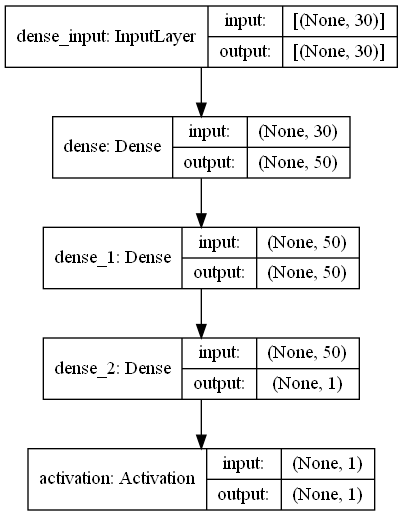

In [15]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
# Obtains the results as a probability
prediction = model.predict(X_test)
# Obtains the results as a class (here 0/1)
prediction_class = np.argmax(prediction, axis=1)

print('pred_proba: ', prediction)
print('pred_class: ', prediction_class)

pred_proba:  [[0.42782688]
 [0.7056819 ]
 [0.8495923 ]
 ...
 [0.803797  ]
 [0.15450108]
 [0.23425591]]
pred_class:  [0 0 0 ... 0 0 0]


We use our outcomes to calculate the final evaluation metrics:

In [14]:
print('Accuracy:', accuracy_score(y_test,prediction_class))
print('AUC:',roc_auc_score(y_test,prediction))

Accuracy: 0.7364928909952607
AUC: 0.8238775774746998


That's not a bad result. We will learn how to improve it later in the course.